## 1.1 Load and explore the training and testing data 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, accuracy_score, classification_report, precision_score, recall_score, f1_score


import time 

class Data(object):
    def __init__(self,name,path):
        self.name = str(name).split('.')[0]
        self.data = pd.read_csv(path+'/'+name)


def plot_auc(labels, probs,model_name):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = roc_curve(labels, probs[:,1])
    AUC = auc(fpr, tpr)
    
    ## Plot the result
    plt.title(model_name + ' ROC')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % AUC)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def apply_mode(X_train,y_train,X_test,y_test,model,model_name):
    model = model
    tic = time.perf_counter()
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    toc = time.perf_counter()
    
    model_acc = model.score(X_test,y_test.values.ravel())
    model_log_loss = log_loss(y_test,y_pred)
    model_precision_score = precision_score(y_test,y_pred)
    model_recall_score = recall_score(y_test,y_pred)
    model_f1_score = f1_score(y_test,y_pred)

    print('1- accuracy of {} model is: {:2.2f}'.format(model_name,model_acc))
    print('2- log loss for {} model is: {:2.2f}'.format(model_name,model_log_loss))
    print('3- precision score for {} model is: {:2.2f}'.format(model_name,model_precision_score))
    print('4- recall score for {} model is: {:2.2f}'.format(model_name,model_recall_score))
    print('5- f1 score for {} model is: {:2.2f}'.format(model_name,model_f1_score))
    print('Total elapsed time is: {:0.4f} (s)'.format(toc - tic))

    plot_auc(y_test, y_pred_prob,model_name)    


In [38]:
#load data from jupyter invironment
data_path = '../data/train-test'
data_list = []
for file in os.listdir(data_path):
  data = Data(file,data_path)
  data_list.append(data.name)
  vars()[data.name] = data.data

In [12]:
# print the available data
print ([x for x in data_list])

['bc_data_y_train', 'bc_data_X_train_selected', 'bc_data_X_test_selected', 'bc_data_X_train', 'bc_data_y_test_selected', 'bc_data_y_test', 'bc_data_X_test', 'bc_data_y_train_selected']


In [13]:
# explore the whole data 
print(bc_data_X_train.shape)
print(bc_data_X_test.shape)
print(bc_data_y_train.shape)
print(bc_data_y_test.shape)

(4566, 24)
(2250, 24)
(4566, 1)
(2250, 1)


In [14]:
print(bc_data_X_train.columns)

Index(['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Race_Other', 'Race_White', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Grade II', 'Grade_Grade III',
       'Grade_anaplastic', 'A Stage_Regional', 'Estrogen Status_Positive',
       'Progesterone Status_Positive'],
      dtype='object')


In [15]:
# explore the select data 
print(bc_data_X_train_selected.shape)
print(bc_data_X_test_selected.shape)
print(bc_data_y_train_selected.shape)
print(bc_data_y_test_selected.shape)

(4566, 5)
(2250, 5)
(4566, 1)
(2250, 1)


In [16]:
print(bc_data_X_train_selected.columns)

Index(['Grade_Grade II', 'Progesterone Status_Positive', '6th Stage_IIIC',
       'Marital Status_Married', 'Estrogen Status_Positive'],
      dtype='object')


## 2.1 Explore different models with default values
#### We will use the deafult models just to get the idea how they work and then go deeper to each model. Also in below section we will use all the available data.

1- accuracy of Logistic Regression model is: 0.81
2- log loss for Logistic Regression model is: 6.54
3- precision score for Logistic Regression model is: 0.84
4- recall score for Logistic Regression model is: 0.77
5- f1 score for Logistic Regression model is: 0.80
Total elapsed time is: 0.0413 (s)


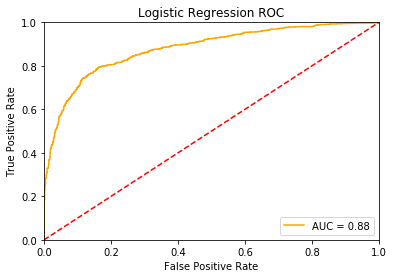

1- accuracy of Random Forest model is: 0.85
2- log loss for Random Forest model is: 5.05
3- precision score for Random Forest model is: 0.85
4- recall score for Random Forest model is: 0.86
5- f1 score for Random Forest model is: 0.85
Total elapsed time is: 0.0366 (s)


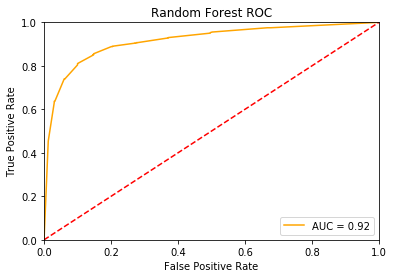

1- accuracy of KNN model is: 0.83
2- log loss for KNN model is: 6.03
3- precision score for KNN model is: 0.78
4- recall score for KNN model is: 0.91
5- f1 score for KNN model is: 0.84
Total elapsed time is: 0.0412 (s)


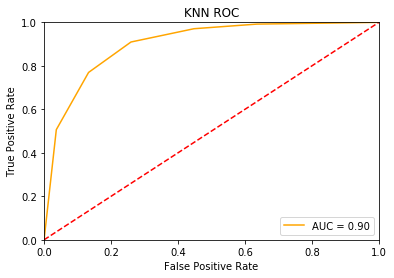

1- accuracy of Decesion Tree Model model is: 0.82
2- log loss for Decesion Tree Model model is: 6.16
3- precision score for Decesion Tree Model model is: 0.81
4- recall score for Decesion Tree Model model is: 0.84
5- f1 score for Decesion Tree Model model is: 0.83
Total elapsed time is: 0.0105 (s)


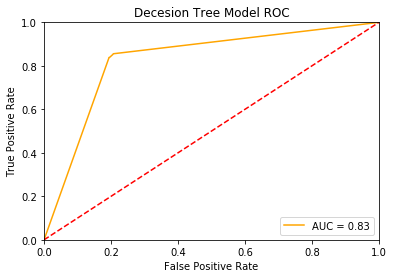

1- accuracy of SVM Model model is: 0.82
2- log loss for SVM Model model is: 6.32
3- precision score for SVM Model model is: 0.83
4- recall score for SVM Model model is: 0.81
5- f1 score for SVM Model model is: 0.82
Total elapsed time is: 2.3361 (s)


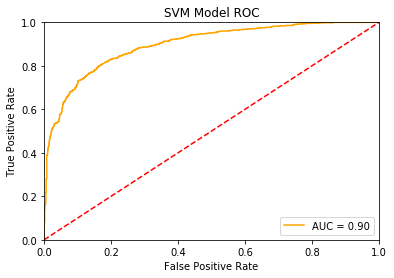

In [36]:
log_reg_model = LogisticRegression()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,log_reg_model,'Logistic Regression')

rf_model = RandomForestClassifier()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,rf_model,'Random Forest')

knn_model = KNeighborsClassifier()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,knn_model,'KNN')

dt_model = DecisionTreeClassifier()
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,dt_model,'Decesion Tree Model')

SVM_model = SVC(probability=True)
apply_mode(bc_data_X_train,bc_data_y_train,bc_data_X_test,bc_data_y_test,SVM_model,'SVM Model')


1- accuracy of Logistic Regression for selected data model is: 0.73
2- log loss for Logistic Regression for selected data model is: 9.35
3- precision score for Logistic Regression for selected data model is: 0.74
4- recall score for Logistic Regression for selected data model is: 0.71
5- f1 score for Logistic Regression for selected data model is: 0.73
Total elapsed time is: 0.0110 (s)


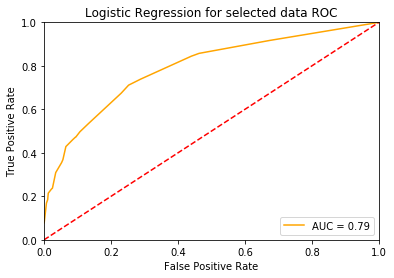

1- accuracy of Random Forest for selected data model is: 0.73
2- log loss for Random Forest for selected data model is: 9.38
3- precision score for Random Forest for selected data model is: 0.74
4- recall score for Random Forest for selected data model is: 0.71
5- f1 score for Random Forest for selected data model is: 0.72
Total elapsed time is: 0.0141 (s)


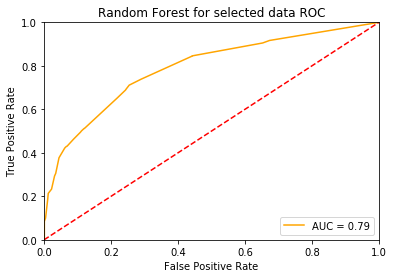

1- accuracy of KNN for selected data model is: 0.69
2- log loss for KNN for selected data model is: 10.65
3- precision score for KNN for selected data model is: 0.65
4- recall score for KNN for selected data model is: 0.83
5- f1 score for KNN for selected data model is: 0.73
Total elapsed time is: 0.0420 (s)


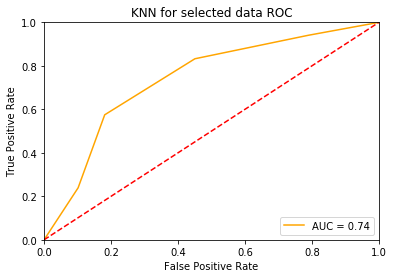

1- accuracy of Decesion Tree Model for selected data model is: 0.73
2- log loss for Decesion Tree Model for selected data model is: 9.39
3- precision score for Decesion Tree Model for selected data model is: 0.74
4- recall score for Decesion Tree Model for selected data model is: 0.71
5- f1 score for Decesion Tree Model for selected data model is: 0.72
Total elapsed time is: 0.0015 (s)


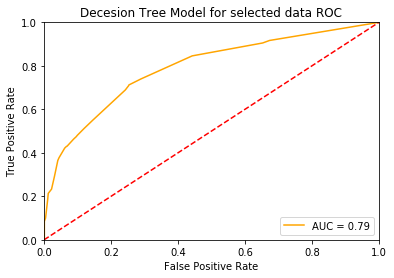

1- accuracy of SVM Model for selected data model is: 0.72
2- log loss for SVM Model for selected data model is: 9.67
3- precision score for SVM Model for selected data model is: 0.72
4- recall score for SVM Model for selected data model is: 0.72
5- f1 score for SVM Model for selected data model is: 0.72
Total elapsed time is: 1.1410 (s)


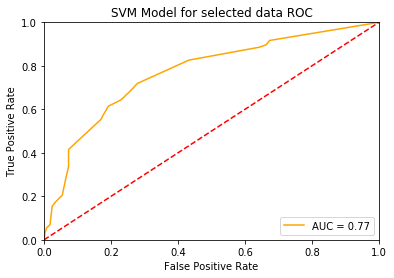

In [37]:
log_reg_model = LogisticRegression()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,log_reg_model,'Logistic Regression for selected data')

rf_model = RandomForestClassifier()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,rf_model,'Random Forest for selected data')

knn_model = KNeighborsClassifier()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,knn_model,'KNN for selected data')

dt_model = DecisionTreeClassifier()
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,dt_model,'Decesion Tree Model for selected data')

SVM_model = SVC(probability=True)
apply_mode(bc_data_X_train_selected,bc_data_y_train_selected,bc_data_X_test_selected,bc_data_y_test_selected,SVM_model,'SVM Model for selected data')

## 2.2 Default Model Comparision 

First lets see the result for all the availbe data


| Model | Deafualt values | Accuracy | F1-Score| Elapsed time(s)|
| --- | --- | --- | ---| ---|
| Logistic regression | Solver:lbfgs, Penalty:l2 | 0.81|0.80|0.0413|
| Random Forest| n_estimators=100,criterion=gini| 0.86 | 0.86|0.0366|
| KNN | n_neighbors=5 ,algorithm='auto', leaf_size=30,metric='minkowski'| 0.83| 0.84|0.0412|
| Decesion Tree|criterion='gini'| 0.82| 0.83|0.0105|
|SVM|C=1.0, kernel='rbf', degree=3, gamma='scale'|0.83|0.82|2.3361|

Now lets see the result for all the availbe data

| Model | Deafualt values | Accuracy | F1-Score| Elapsed time(s)|
| --- | --- | --- | ---| ---|
| Logistic regression | Solver:lbfgs, Penalty:l2 | 0.73|0.73|0.0110|
| Random Forest| n_estimators=100,criterion=gini| 0.73| 0.72| 0.0141|
| KNN | n_neighbors=5 ,algorithm='auto', leaf_size=30,metric='minkowski'| 0.69| 0.73|0.0420|
| Decesion Tree|criterion='gini'| 0.82| 0.83|0.0015|
|SVM|C=1.0, kernel='rbf', degree=3, gamma='scale'|0.83|0.82|1.1410 |

Different classification models with default values, while using all the data or selected data gave us differenet results. 
As seen all models have very close Accurasy and F1-score when using all the data. Elapsed time is much higher in SVM model.

When decreasing the columns and used some specific features('Grade_Grade II', 'Progesterone Status_Positive', '6th Stage_IIIC',
'Marital Status_Married', 'Estrogen Status_Positive') that have most ofm the data's propertry, the accuracy declined in most of the models, except Decesion Tree and SVM.
Also the elapsed time decreased in most of the models except in KNN.

In conclusion, as the data is not so huge and the elapsed time does not seem to be a problem and the accuracy is better with all the data, we will use all the data for deeper analysis.

## 3.1 Modelling

Model 1: Logistic Regression